<a href="https://colab.research.google.com/github/nurikahraman/FoodTracker/blob/main/Fisheye_Effect_Correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import glob
import cv2
from google.colab.patches import cv2_imshow

calib_radial.jpg


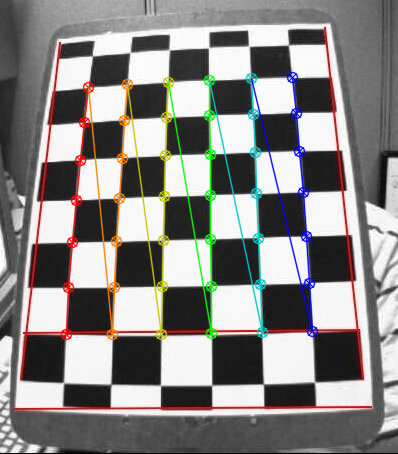

In [19]:

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('*.jpg')



for fname in images:
 print(fname)
 img = cv2.imread(fname, cv2.IMREAD_UNCHANGED)
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

 # Find the chess board corners
 ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

 # If found, add object points, image points (after refining them)
 if ret == True:
   objpoints.append(objp)

 corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
 imgpoints.append(corners2)

 # Draw and display the corners
 cv2.drawChessboardCorners(img, (7,6), corners2, ret)
 cv2_imshow(img)
 #cv2.waitKey(500)

#cv2.destroyAllWindows()

**Calibration**

In [21]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

**Undistortion**

In [23]:
img = cv2.imread('/content/calib_radial.jpg')
h, w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

1. Using **cv2.undistort()**

In [27]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult1.png', dst)

True

2. Using **remapping**

In [28]:
# undistort
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w,h), 5)
dst = cv2.remap(img, mapx, mapy, cv2.INTER_LINEAR)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult2.png', dst)

True